In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/k


/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [14]:
df = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [16]:

b = df.isnull().sum()

print(b)

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [17]:
#check for missing values
print(df.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [18]:
# Handle data using one-hot encoding
df = pd.get_dummies(df,columns=['Geography', 'Gender', 'Card Type'])
# Remove irrelevant data
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

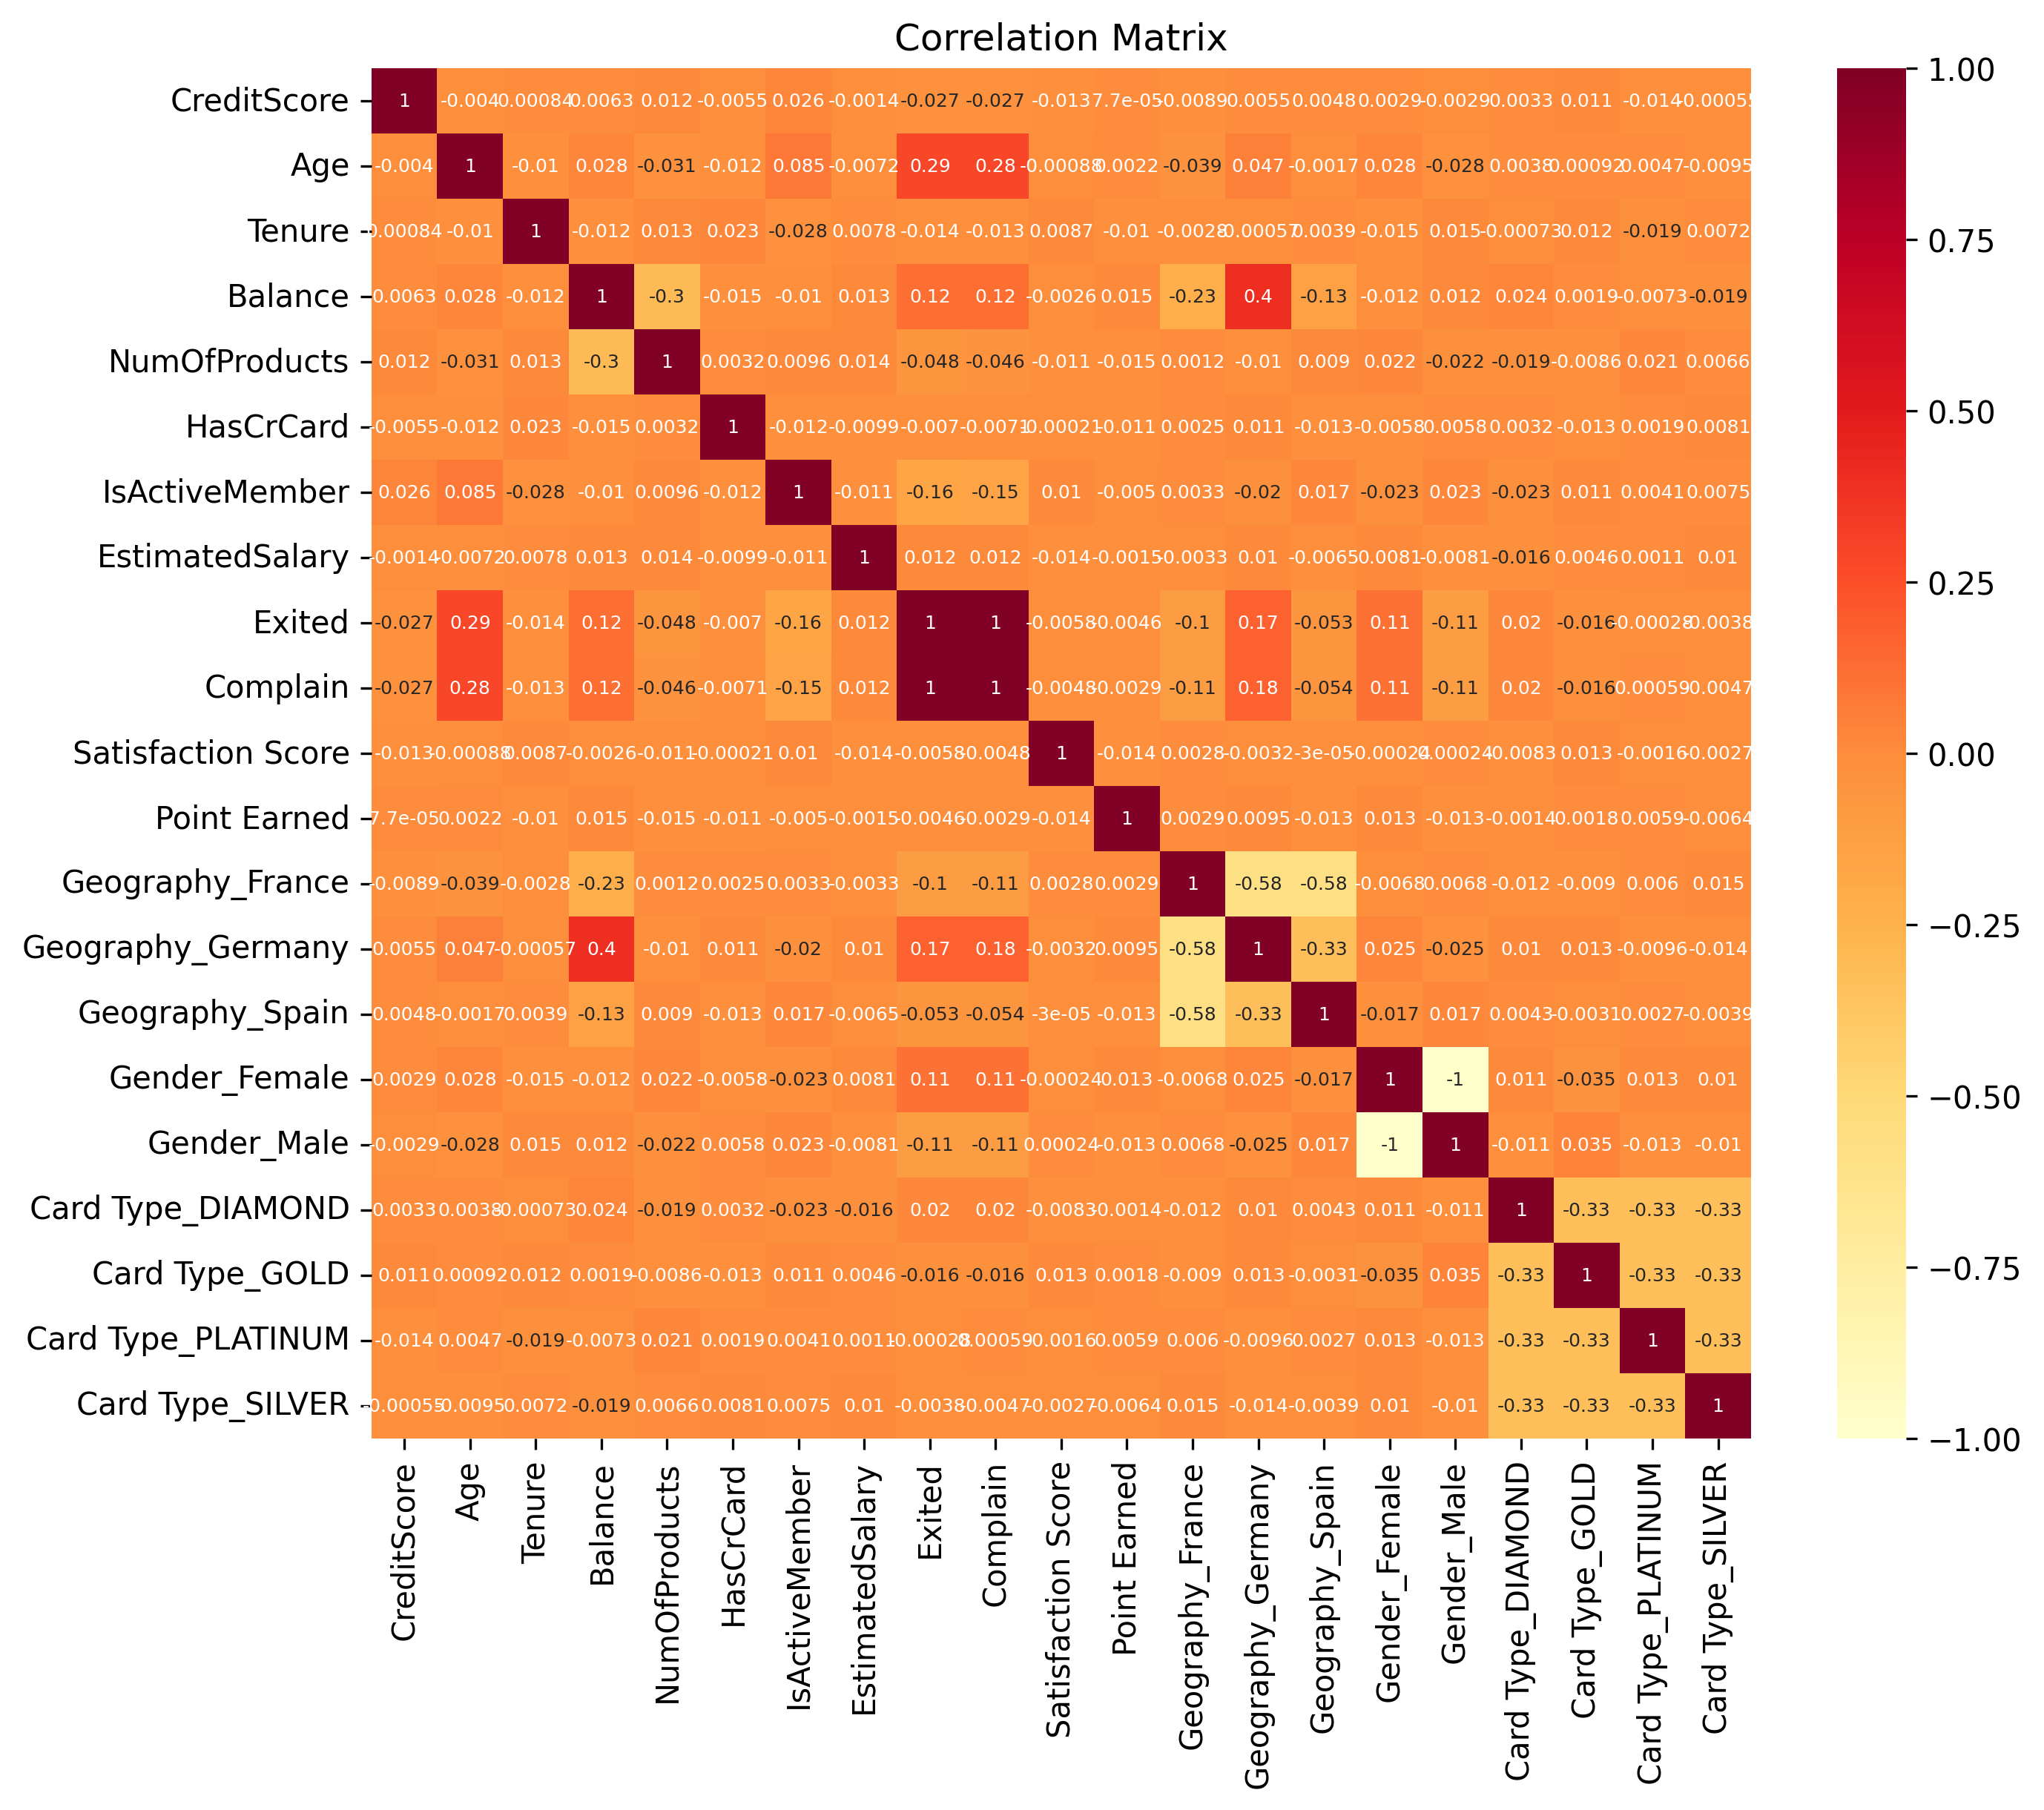

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
#Visualize the correlation matrix using heatmap
plt.figure(figsize = (10,8), dpi = 300)
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot = True, cmap='YlOrRd',annot_kws={'size':6})
plt.show()


In [20]:
# Analyze churn rate
churn_rate = df["Exited"].mean()
print("total churn rate : ",churn_rate)
# Analyze churn rate by gender
gender_churn = df.groupby("Gender_Male")["Exited"].mean()
print('Churn Rate by Gender:')
print(gender_churn)



total churn rate :  0.2038
Churn Rate by Gender:
Gender_Male
0    0.250715
1    0.164743
Name: Exited, dtype: float64


In [21]:
average_balance_churned = df[df["Exited"] == 1]["Balance"].mean()
average_balance_retained = df[df["Exited"] == 0]["Balance"].mean()
print('Average Balance - Churned:', average_balance_churned)
print('Average Balance - Retained:', average_balance_retained)

Average Balance - Churned: 91109.47600588812
Average Balance - Retained: 72742.75066314996


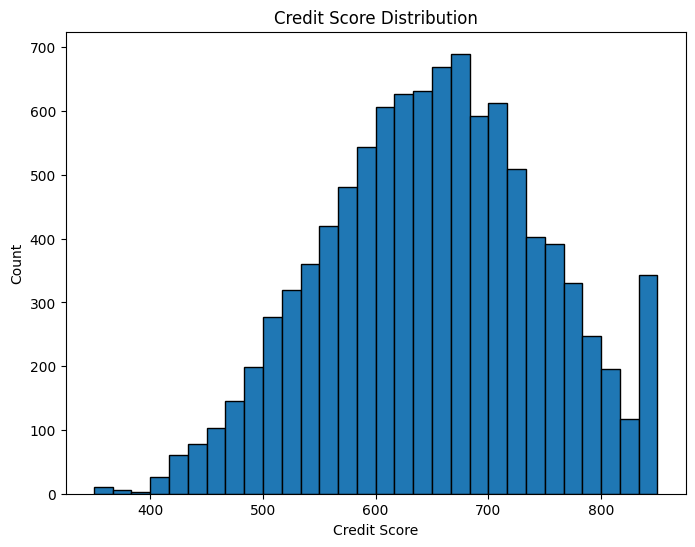

In [22]:
plt.figure(figsize=(8,6))
plt.title('Credit Score Distribution')
plt.hist(df['CreditScore'], bins=30, edgecolor='k')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Split the dataset into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.999
Confusion Matrix:
[[1606    1]
 [   1  392]]


In [25]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.9974554707379135


In [26]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.9974554707379135
